In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X shape: (100, 1)
y shape: (100,)


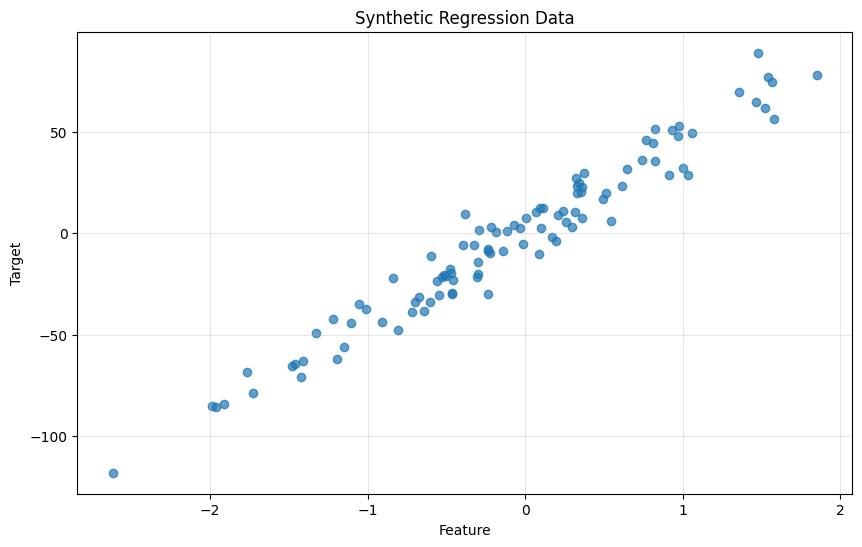

In [23]:
# Set random seed for reproducibility
np.random.seed(42)

# Part 1: Implementing gradient descent from scratch for linear regression
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.title('Synthetic Regression Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True, alpha=0.3)
plt.show()


X.shape:(100, 1)   X_b.shape: (100, 2)  theta.shape: (2,)
#1: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#2: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#3: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#4: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#5: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#6: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#7: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#8: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#9: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#10: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#11: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#12: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#13: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#14: X:(100, 2) y:(100,) theta:(2,) predictions:(100,)

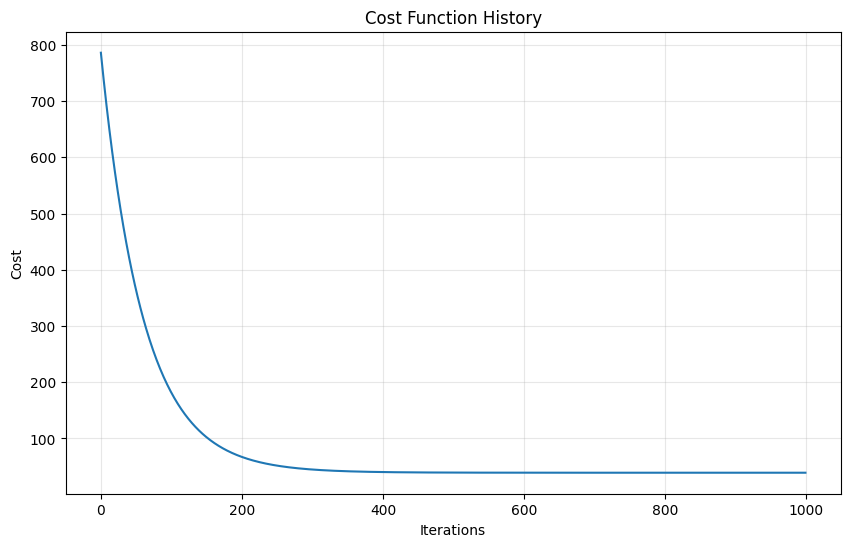

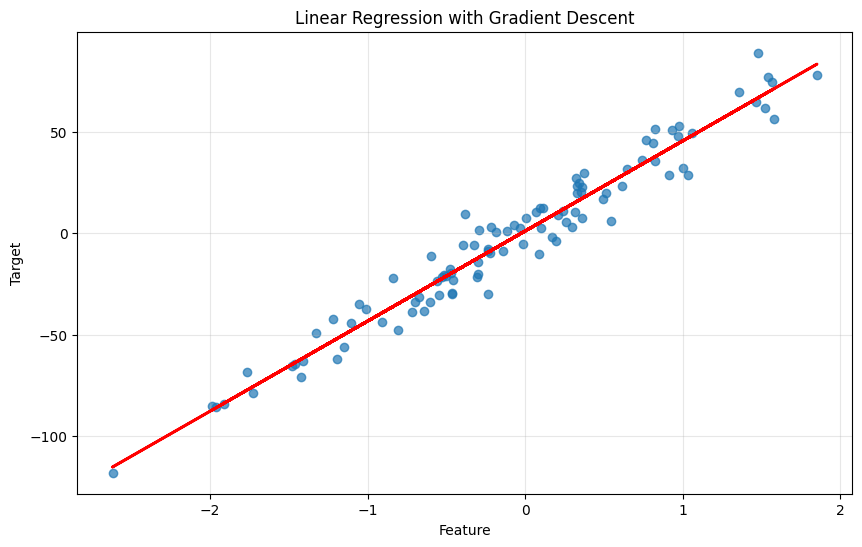

In [25]:
# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, len(theta)))
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        print(f"#{i+1}: X:{X.shape} y:{y.shape} theta:{theta.shape} predictions:{predictions.shape} errors:{errors.shape}")
        
        # Calculate the gradient
        gradient = (1/m) * X.T.dot(errors)
        
        # Update parameters
        theta = theta - learning_rate * gradient
        
        # Store theta and cost
        theta_history[i]= theta
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history, theta_history

# Add a bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize parameters (theta)
theta = np.random.randn(2, )

print(f'X.shape:{X.shape}   X_b.shape: {X_b.shape}  theta.shape: {theta.shape}')

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta_final, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

print(f"Final theta values: {theta_final.flatten()}")

# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.title('Cost Function History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)
plt.show()

# Plot the final regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X, X_b.dot(theta_final), color='red', linewidth=2)
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True, alpha=0.3)
plt.show()


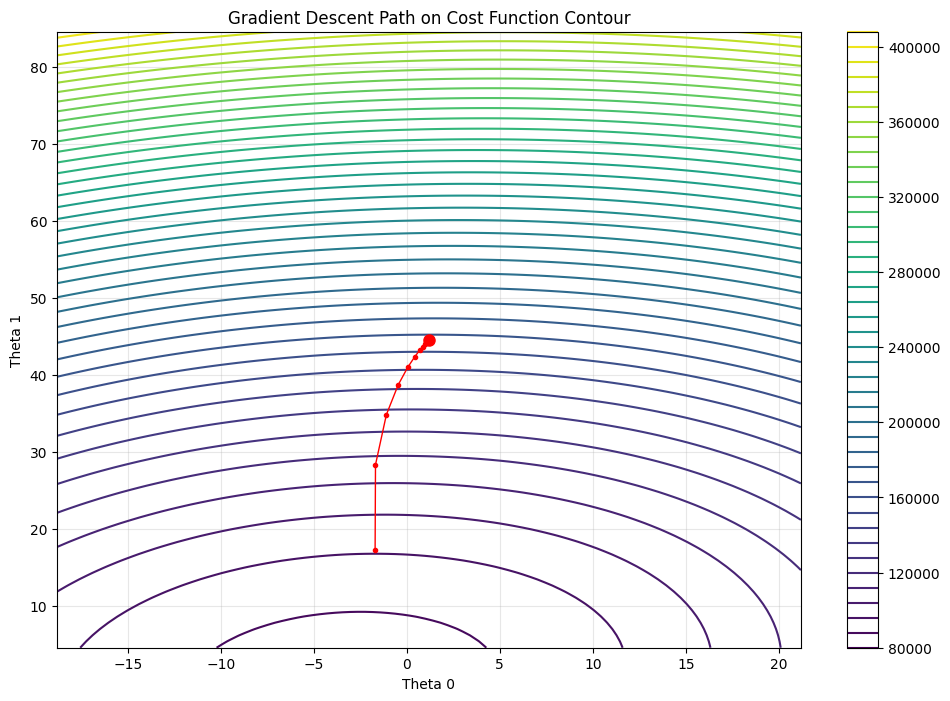

SGDRegressor RMSE: 10.2392
LinearRegression RMSE: 10.2079


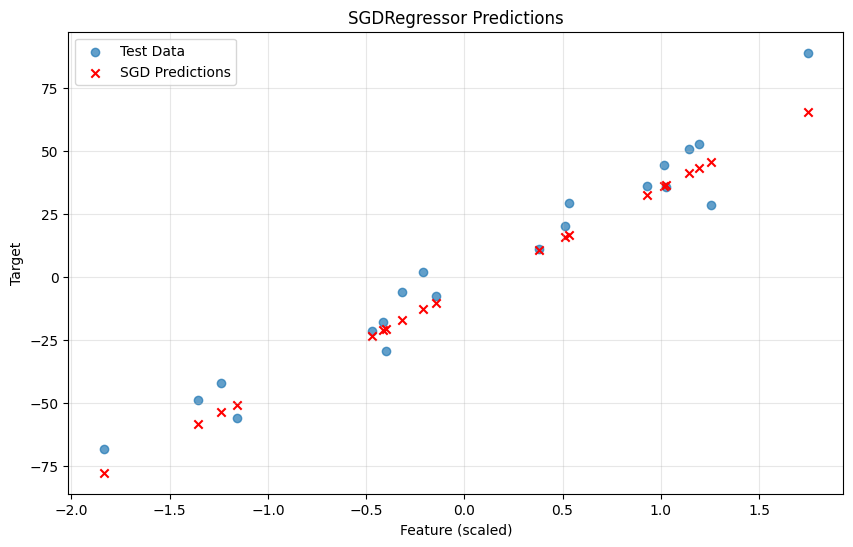

#1: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#2: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#3: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#4: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#5: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#6: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#7: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#8: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#9: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#10: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#11: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#12: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#13: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#14: X:(100, 2) y:(100,) theta:(2,) predictions:(100,) errors:(100,)
#15: X:(100, 2) y:(100,) theta:(2,) predict

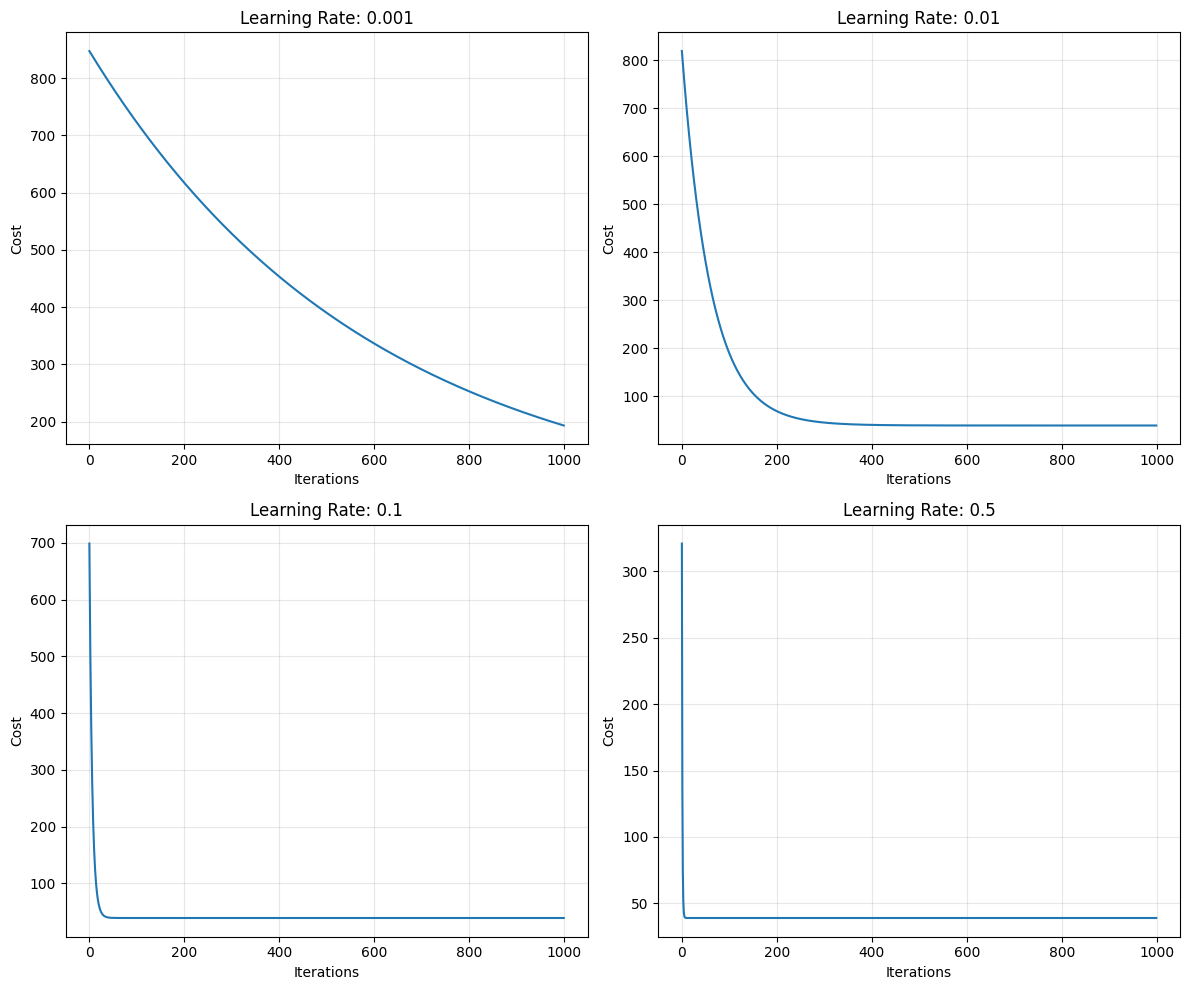

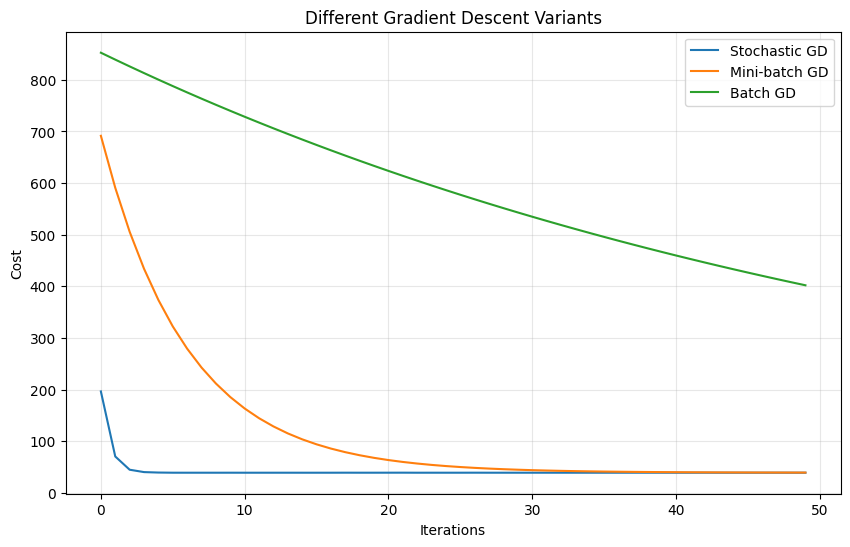

In [28]:
# Part 2: Visualizing gradient descent in action
# Create a mesh grid to visualize the cost function
theta0_vals = np.linspace(theta_final[0] - 20, theta_final[0] + 20, 100)
theta1_vals = np.linspace(theta_final[1] - 40, theta_final[1] + 40, 100)
theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)
cost_mesh = np.zeros(theta0_mesh.shape)

# Calculate cost for each theta combination
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_mesh[j, i]], [theta1_mesh[j, i]]])
        cost_mesh[j, i] = compute_cost(X_b, y, t)

# Plot the cost function as a contour plot
plt.figure(figsize=(12, 8))

# Create contour plot
contour = plt.contour(theta0_mesh, theta1_mesh, cost_mesh, 50, cmap='viridis')
plt.colorbar(contour)

# Plot the path of gradient descent
plt.plot(theta_history[:, 0], theta_history[:, 1], 'r-o', markersize=3, linewidth=1)
plt.plot(theta_final[0], theta_final[1], 'ro', markersize=8)

plt.title('Gradient Descent Path on Cost Function Contour')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.grid(True, alpha=0.3)
plt.show()

# Part 3: Using scikit-learn's SGDRegressor
# Scale features for better convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SGD regressor
sgd_reg = SGDRegressor(loss='squared_error', penalty=None, max_iter=1000, 
                       learning_rate='constant', eta0=0.01, random_state=42)

# Train the model
sgd_reg.fit(X_train, y_train)

# Make predictions
y_pred = sgd_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"SGDRegressor RMSE: {rmse:.4f}")

# Compare with standard LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
print(f"LinearRegression RMSE: {lin_rmse:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.7, label='Test Data')
plt.scatter(X_test, y_pred, color='red', marker='x', label='SGD Predictions')
plt.title('SGDRegressor Predictions')
plt.xlabel('Feature (scaled)')
plt.ylabel('Target')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Part 4: Learning rate comparison
learning_rates = [0.001, 0.01, 0.1, 0.5]
plt.figure(figsize=(12, 10))

for i, lr in enumerate(learning_rates):
    # Reset theta
    theta = np.random.randn(2, )
    
    # Run gradient descent with different learning rates
    theta_final, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, iterations)
    
    plt.subplot(2, 2, i+1)
    plt.plot(range(iterations), cost_history)
    plt.title(f'Learning Rate: {lr}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Part 5: Implement stochastic gradient descent
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations, batch_size=1):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = max(m // batch_size, 1)
    
    for i in range(iterations):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for j in range(n_batches):
            # Select batch
            start_idx = j * batch_size
            end_idx = min((j + 1) * batch_size, m)
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            
            # Calculate gradient on batch
            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            gradient = (1/len(y_batch)) * X_batch.T.dot(errors)
            
            # Update parameters
            theta = theta - learning_rate * gradient
        
        # Store cost for the entire dataset
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Compare batch GD, mini-batch GD, and stochastic GD
batch_sizes = [1, 10, len(y)]  # stochastic, mini-batch, batch GD
labels = ['Stochastic GD', 'Mini-batch GD', 'Batch GD']

plt.figure(figsize=(10, 6))

for i, batch_size in enumerate(batch_sizes):
    # Reset theta
    theta = np.random.randn(2, )
    
    # Run gradient descent with different batch sizes
    theta_final, cost_history = stochastic_gradient_descent(X_b, y, theta, 0.01, 50, batch_size)
    
    plt.plot(range(len(cost_history)), cost_history, label=labels[i])

plt.title('Different Gradient Descent Variants')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
